In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os

In [2]:
train_df=pd.read_csv("/home/manpreet/codes/medical/pnumonia/data/metadata.csv")

In [3]:
train_df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [4]:
train_df=train_df.drop(["Unnamed: 0"],1)

In [5]:
train_df.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   X_ray_image_name        5910 non-null   object
 1   Label                   5910 non-null   object
 2   Dataset_type            5910 non-null   object
 3   Label_2_Virus_category  69 non-null     object
 4   Label_1_Virus_category  4334 non-null   object
dtypes: object(5)
memory usage: 231.0+ KB


In [7]:
print("Value count for \n\n {} \n {} \n\n\n {} \n {} \n\n\n {} \n {} \n\n\n {} \n {} ".format("label",train_df.Label.value_counts()
                                                                ,"Label_2_Virus_category",train_df.Label_2_Virus_category.value_counts(),
                                                                "Label_1_Virus_category",train_df.Label_2_Virus_category.value_counts(),
                                                                "Dataset",train_df.Dataset_type.value_counts()))

Value count for 

 label 
 Pnemonia    4334
Normal      1576
Name: Label, dtype: int64 


 Label_2_Virus_category 
 COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64 


 Label_1_Virus_category 
 COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64 


 Dataset 
 TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64 


In [8]:
print("we are only going for Pnemonia vs normal classification")
train_df=train_df.drop(["Dataset_type","Label_2_Virus_category","Label_1_Virus_category"],1)

we are only going for Pnemonia vs normal classification


In [9]:
print("Columns names are ",list(train_df.keys()))

Columns names are  ['X_ray_image_name', 'Label']


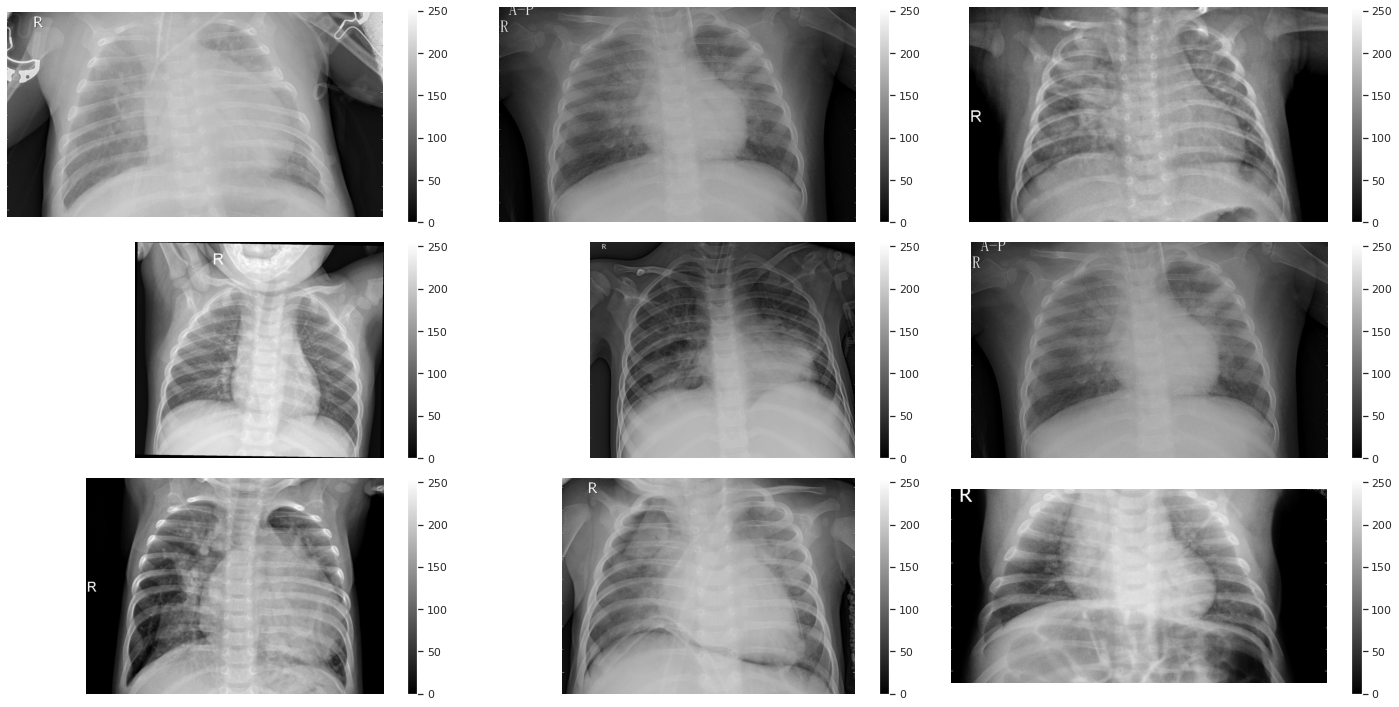

In [10]:
images=train_df.X_ray_image_name.values
random_images=[np.random.choice(images) for i in range(9)]
img_dir="/home/manpreet/codes/medical/pnumonia/data/Xray/xray/train"
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img=plt.imread(os.path.join(img_dir,random_images[i]))
    plt.imshow(img,cmap="gray")
    plt.colorbar()
    plt.axis('off')
plt.tight_layout()

<AxesSubplot:xlabel='Label', ylabel='count'>

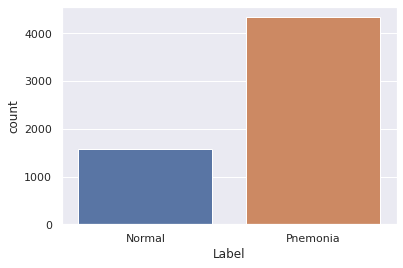

In [17]:
sns.countplot(data=train_df,x="Label")

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
image_generator=ImageDataGenerator(samplewise_center=True,
                                  samplewise_std_normalization=True)


In [36]:
gen=image_generator.flow_from_dataframe(dataframe=train_df,directory=img_dir,
                                       x_col="X_ray_image_name",
                                       y_col=["Label"],
                                       class_mode="raw",
                                       batch_size=1,
                                       shuffle=True,
                                       target_size=(320,320))

Found 5910 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


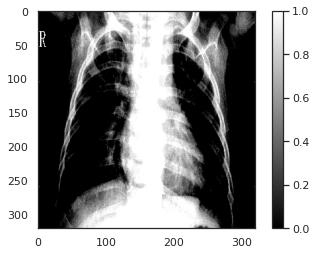

In [37]:
# Plot a processed image
sns.set_style("white")
generated_image, label = gen.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()